This note book will be used to analyze the distance matrices created from filtering based on control and replicate samples

In [1]:
%matplotlib inline
import matplotlib as plt
import pandas as pd
from skbio import DistanceMatrix
from os.path import join
from skbio.stats.ordination import pcoa
from skbio.stats.distance import anosim

Load the map
--------

In [2]:
home = '/home/office-microbe-files'
map_fp = join(home, 'master_map_150908.txt')
sample_md = pd.read_csv(map_fp, sep='\t', index_col=0, dtype=str)
sample_md = sample_md[sample_md['16SITS'] == '16S']

I'll first do the weighted comparisons to see how it looks

In [3]:
dm_13_10_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv13_10/weighted_unifrac_samples_200_table_13_otus_10.txt')
dm_13_100_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv13_100/weighted_unifrac_samples_200_table_13_otus_100.txt')
dm_13_1000_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv13_1000/weighted_unifrac_samples_200_table_13_otus_1000.txt')

dm_23_10_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv23_10/weighted_unifrac_samples_200_table_23_otus_10.txt')
dm_23_100_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv23_100/weighted_unifrac_samples_200_table_23_otus_100.txt')
dm_23_1000_weighted = DistanceMatrix.read('subasampled_sl_bdiv/filtered_sl_bdiv23_1000/weighted_unifrac_samples_200_table_23_otus_1000.txt')

In [10]:
dm_23_1000_weighted.shape

(200, 200)

Weighted Unifrac Periods 1-3
=================

/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1450351751184433 and the largest is 9.967743005227891.
  RuntimeWarning
/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


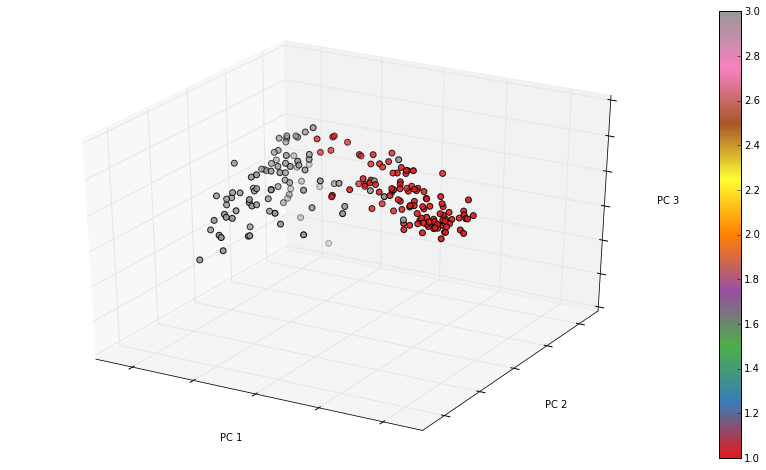

In [4]:
pcoa_results = pcoa(dm_13_10_weighted)
fig = pcoa_results.plot(df=sample_md,
                        column='Run',
                        axis_labels=['PC 1', 'PC 2', 'PC 3'],
                        cmap='Set1',
                        s=35)

fig.set_size_inches(15, 8)

/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.13169027837059716 and the largest is 10.029844715650276.
  RuntimeWarning
/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


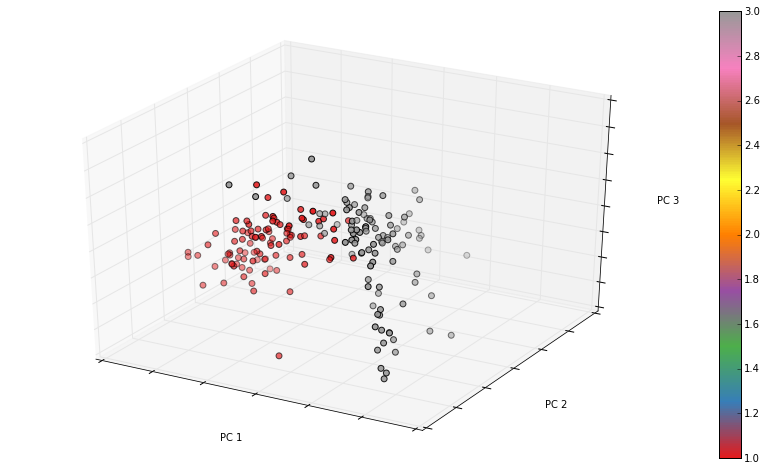

In [5]:
pcoa_results = pcoa(dm_13_100_weighted)
fig = pcoa_results.plot(df=sample_md,
                        column='Run',
                        axis_labels=['PC 1', 'PC 2', 'PC 3'],
                        cmap='Set1',
                        s=35)

fig.set_size_inches(15, 8)

/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.16138643335057076 and the largest is 9.169316416964682.
  RuntimeWarning
/home/johnchase/.conda/envs/data-analysis/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


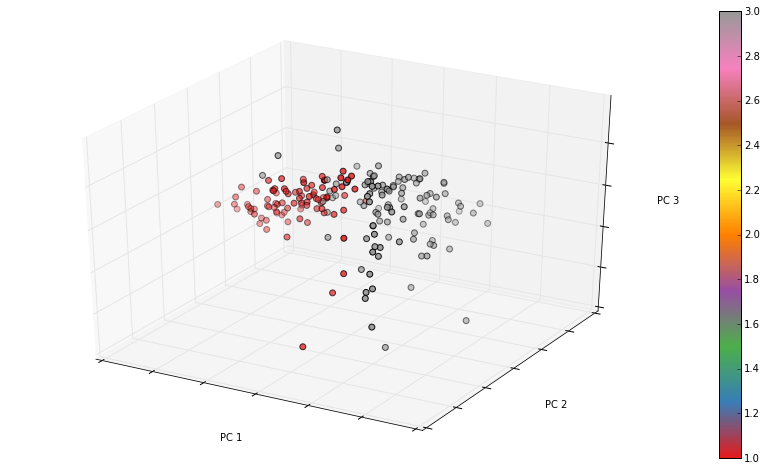

In [6]:
pcoa_results = pcoa(dm_13_1000_weighted)
fig = pcoa_results.plot(df=sample_md,
                        column='Run',
                        axis_labels=['PC 1', 'PC 2', 'PC 3'],
                        cmap='Set1',
                        s=35)

fig.set_size_inches(15, 8)

In [7]:
results_13_10_weighted = anosim(dm_13_10_weighted, sample_md, column='Run', permutations=999)
results_df = results_13_10_weighted.to_frame('results_13_10_weighted')

results_13_100_weighted = anosim(dm_13_100_weighted, sample_md, column='Run', permutations=999)
results_df = pd.concat([results_df, results_13_100_weighted.to_frame('13_100_weighted')], axis=1)

results_13_1000_weighted = anosim(dm_13_1000_weighted, sample_md, column='Run', permutations=999)
results_df = pd.concat([results_df, results_13_1000_weighted.to_frame('13_1000_weighted')], axis=1)

In [8]:
results_23_10_weighted = anosim(dm_23_10_weighted, sample_md, column='Run', permutations=999)
results_df = pd.concat([results_df, results_23_10_weighted.to_frame('23_10_weighted')], axis=1)

results_23_100_weighted = anosim(dm_23_100_weighted, sample_md, column='Run', permutations=999)
results_df = pd.concat([results_df, results_23_100_weighted.to_frame('23_100_weighted')], axis=1)

results_23_1000_weighted = anosim(dm_23_1000_weighted, sample_md, column='Run', permutations=999)
results_df = pd.concat([results_df, results_23_1000_weighted.to_frame('23_1000_weighted')], axis=1)

In [9]:
results_df

,results_13_10_weighted,13_100_weighted,13_1000_weighted,23_10_weighted,23_100_weighted,23_1000_weighted
method name,ANOSIM,ANOSIM,ANOSIM,ANOSIM,ANOSIM,ANOSIM
test statistic name,R,R,R,R,R,R
sample size,200,200,200,200,200,200
number of groups,2,2,2,2,2,2
test statistic,0.573481,0.478626,0.414112,0.265128,0.235908,0.311198
p-value,0.001,0.001,0.001,0.001,0.001,0.001
number of permutations,999,999,999,999,999,999
